# Evaluation of puzzle solving abilities 

In [1]:
import pandas as pd

In [2]:
puzzle_results = pd.read_csv("../results/puzzle_results.csv")

In [3]:
puzzle_results.head()

,PuzzleId,Rating,PGN,Solution,FEN,Moves,principal_variation,solved_by_layer
0,00MTG,669,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Be7 5. O...,Bf2+ Rxf2 Rxf2 Kxf2,4r1k1/2p1qpp1/3p4/1p1P2PQ/1P5b/3R3P/2PBr3/5RK1...,h4f2 f1f2 e2f2 g1f2,"['f1f2', 'e2f2', 'g1f2']","{0: False, 1: True, 2: True, 3: True, 4: True,..."
1,00Msq,1932,1. e4 e5 2. Nf3 Nc6 3. Bc4 Bc5 4. c3 Bb6 5. O-...,Kf8 Bc4 Qxc4 Nxc4,r5k1/1pp2Bp1/5n1p/1q2N3/3P4/7P/5PP1/4Q1K1 b - ...,g8f8 f7c4 b5c4 e5c4,"['f7c4', 'b5c4', 'e5c4']","{0: False, 1: False, 2: False, 3: False, 4: Fa..."
2,00Pbs,2106,1. d4 Nf6 2. Nf3 d5 3. g3 c5 4. Bg2 e6 5. c3 N...,Qxe7 Bg2+ Ke1 Nhf3#,3r1rk1/Q3qppp/8/1ppb4/2Pn1B1n/2N3P1/PP3P2/R2R1...,a7e7 d5g2 f1e1 h4f3,"['d5g2', 'f1e1', 'h4f3']","{0: False, 1: False, 2: False, 3: False, 4: Fa..."
3,00SIq,1880,1. e4 e6 2. Nf3 d5 3. exd5 exd5 4. Nc3 Nf6 5. ...,Rxf7 Qxf7 Qxf7+ Kxf7,r3r1k1/1Q3ppp/8/pP6/2q5/7P/3R2P1/5R1K w - - 0 30,f1f7 c4f7 b7f7 g8f7,"['c4f7', 'b7f7', 'g8f7']","{0: False, 1: False, 2: True, 3: True, 4: True..."
4,00j6z,2225,1. e4 e5 2. Nf3 Nc6 3. Bc4 Nf6 4. Nc3 Bc5 5. d...,Nxd5 Rxg4+ Qg5+ Rxg5+,r4r2/ppp1qpk1/3p1n2/2bNp3/2B1P1pR/3P2B1/PPPK1P...,f6d5 h4g4 e7g5 g4g5,"['h4g4', 'e7g5', 'g4g5']","{0: False, 1: False, 2: True, 3: True, 4: True..."


### Fraction of puzzles that are solved by each layer

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ast

In [5]:
# Enable LaTeX rendering in matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 11,
    "font.size": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": (5.5, 4),  # Set figure size for thesis column width
    "figure.dpi": 300,           # High DPI for print quality
    "savefig.bbox": "tight",     # Tight bounding box
    "savefig.pad_inches": 0.05   # Minimal padding
})

In [6]:
def compute_solve_rates(df):
    """
    Compute the fraction of puzzles solved by each layer.
    
    Args:
        df: Dataframe containing a 'solved_by_layer' column with dictionaries
    
    Returns:
        tuple: (layer_indices, solve_rates)
    """
    # Extract the solved_by_layer dictionaries
    solved_by_layer_dicts = []
    
    for item in df['solved_by_layer']:
        if isinstance(item, str):
            # Convert string representation to dictionary
            solved_by_layer_dicts.append(ast.literal_eval(item))
        else:
            solved_by_layer_dicts.append(item)
    
    # Find the maximum layer index
    max_layer = max(max(d.keys()) for d in solved_by_layer_dicts)
    
    # Initialize counts for each layer
    layer_counts = [0] * (max_layer + 1)
    total_puzzles = len(df)
    
    # Count solved puzzles for each layer
    for d in solved_by_layer_dicts:
        for layer in range(max_layer + 1):
            if layer in d and d[layer]:
                layer_counts[layer] += 1
    
    # Compute fractions
    solve_rates = [count / total_puzzles for count in layer_counts]
    layer_indices = list(range(max_layer + 1))
    
    return layer_indices, solve_rates

In [7]:
layers, rates = compute_solve_rates(puzzle_results)

In [8]:
# Create layer mapping
layer_mapping = {
    0: "Input",
    len(layers) - 1: "Final"  # Assuming last layer is full model
}
# For intermediate layers, use 0-based index
for i in range(1, len(layers) - 1):
    layer_mapping[i] = f"{i-1}"

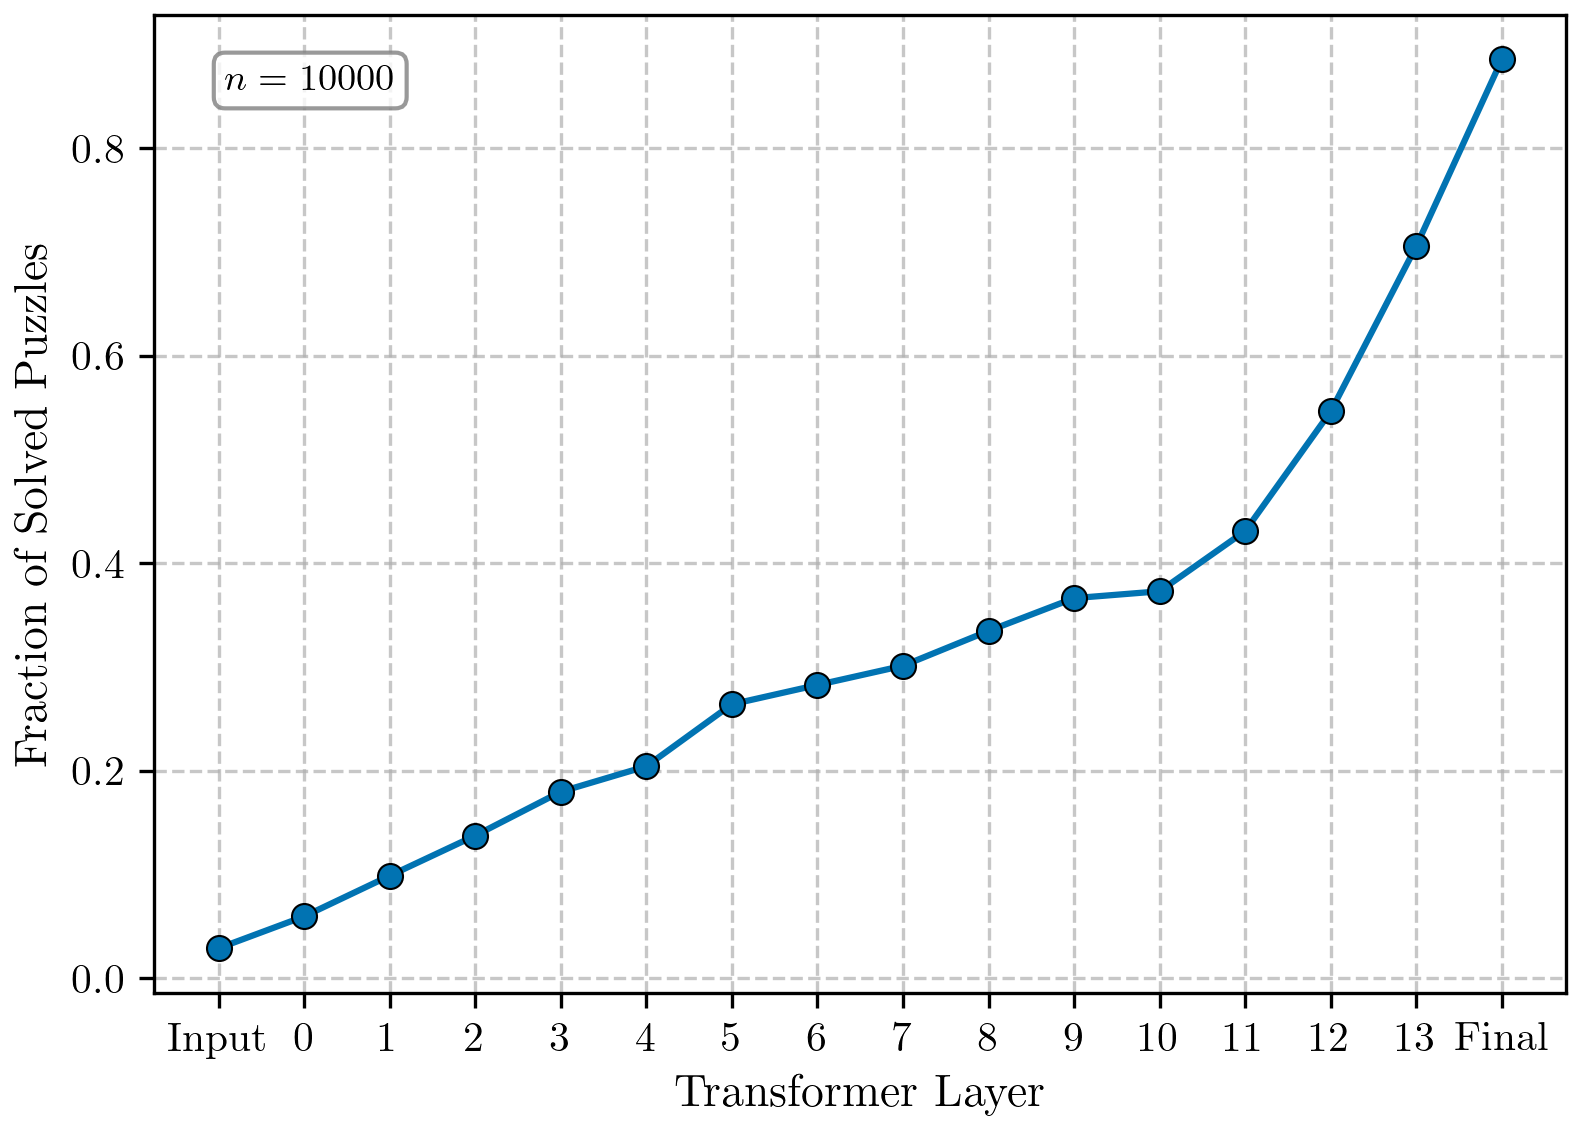

In [9]:
# Create figure
fig, ax = plt.subplots()

# Plot the data
ax.plot(layers, rates, 'o-', color='#0173B2', 
        markeredgecolor='black', markeredgewidth=0.5)

# Create custom x-axis labels
x_pos = np.arange(len(layers))
x_labels = [layer_mapping.get(idx, str(idx)) for idx in layers]

# Formatting
ax.set_xlabel('Transformer Layer')
ax.set_ylabel('Fraction of Solved Puzzles')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, rotation=0)
ax.grid(True, linestyle='--', alpha=0.7)

# Add dataset size annotation
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
ax.text(0.05, 0.95, f"$n = {len(puzzle_results)}$", 
        transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=bbox_props)

plt.tight_layout()

# Save as both PDF (for LaTeX) and PNG (for preview)
# plt.savefig('puzzle_solve_rates.pdf')
# plt.savefig('puzzle_solve_rates.png', dpi=300)
plt.show()

### More extensive analysis

=== PUZZLE SOLVE RATE ANALYSIS ===
Total puzzles: 10000

Final layer performance:
  Layer solve rate: 0.886
  Cumulative solve rate: 0.930
  Final solve rate: 0.886
  First solve rate: 0.138

Layerwise first solve breakdown:
  Input: 0.029 (288 puzzles)
  0: 0.056 (560 puzzles)
  1: 0.052 (517 puzzles)
  2: 0.056 (563 puzzles)
  3: 0.065 (650 puzzles)
  4: 0.045 (450 puzzles)
  5: 0.056 (558 puzzles)
  6: 0.043 (425 puzzles)
  7: 0.031 (309 puzzles)
  8: 0.035 (351 puzzles)
  9: 0.029 (287 puzzles)
  10: 0.027 (271 puzzles)
  11: 0.048 (484 puzzles)
  12: 0.089 (895 puzzles)
  13: 0.131 (1314 puzzles)
  Final: 0.138 (1382 puzzles)

Final solve rate pattern (solved by layer AND all later layers):
  Input: 0.002 (20 puzzles)
  0: 0.019 (187 puzzles)
  1: 0.037 (370 puzzles)
  2: 0.059 (586 puzzles)
  3: 0.084 (837 puzzles)
  4: 0.107 (1073 puzzles)
  5: 0.149 (1490 puzzles)
  6: 0.178 (1778 puzzles)
  7: 0.202 (2020 puzzles)
  8: 0.230 (2297 puzzles)
  9: 0.262 (2621 puzzles)
  10: 0.296

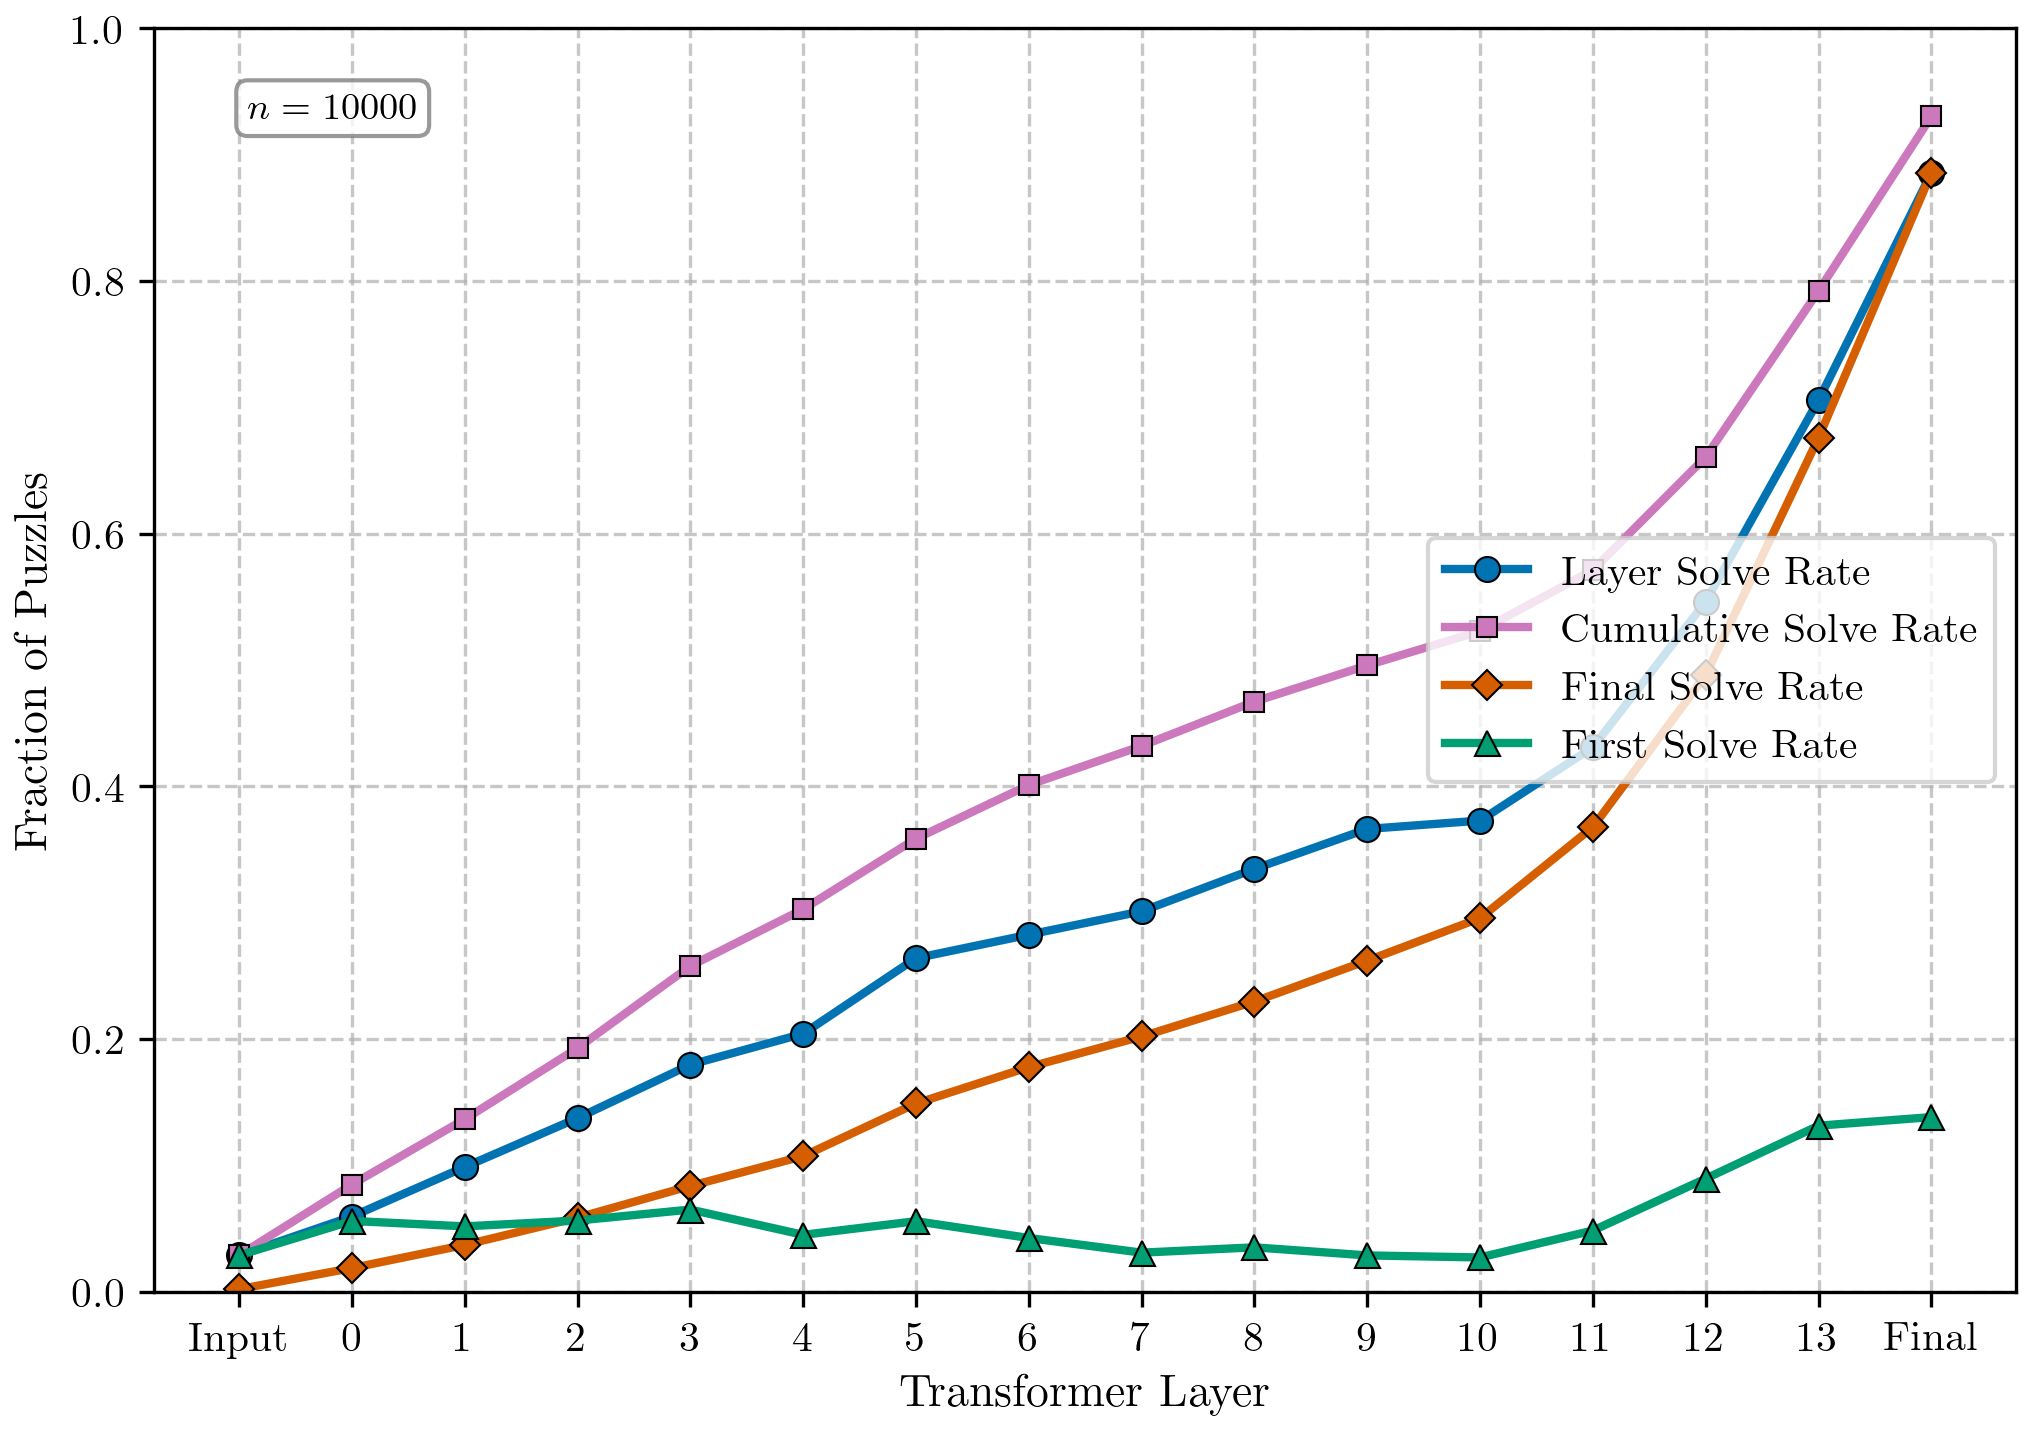

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ast

# Enable LaTeX rendering in matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 11,
    "font.size": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": (7, 5),    # Wider figure for multiple lines
    "figure.dpi": 300,           # High DPI for print quality
    "savefig.bbox": "tight",     # Tight bounding box
    "savefig.pad_inches": 0.05   # Minimal padding
})

def compute_comprehensive_solve_rates(df):
    """
    Compute four types of solve rates:
    1. Layer solve rate: fraction solved by each layer
    2. Cumulative solve rate: fraction solved by this layer OR any layer before
    3. Final solve rate: fraction solved by this layer AND all later layers
    4. First solve rate: fraction first solved by this layer (not solved by earlier layers)
    
    Args:
        df: Dataframe containing a 'solved_by_layer' column with dictionaries
    
    Returns:
        tuple: (layer_indices, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates)
    """
    # Extract the solved_by_layer dictionaries
    solved_by_layer_dicts = []
    
    for item in df['solved_by_layer']:
        if isinstance(item, str):
            # Convert string representation to dictionary
            solved_by_layer_dicts.append(ast.literal_eval(item))
        else:
            solved_by_layer_dicts.append(item)
    
    # Find the maximum layer index
    max_layer = max(max(d.keys()) for d in solved_by_layer_dicts)
    total_puzzles = len(df)
    
    # Initialize arrays
    layer_indices = list(range(max_layer + 1))
    layer_solve_counts = [0] * (max_layer + 1)
    cumulative_solve_counts = [0] * (max_layer + 1)
    final_solve_counts = [0] * (max_layer + 1)
    first_solve_counts = [0] * (max_layer + 1)
    
    # Process each puzzle
    for puzzle_dict in solved_by_layer_dicts:
        # Track if puzzle has been solved by any earlier layer
        solved_by_earlier = False
        
        # Go through layers in order for cumulative and first solve
        for layer in range(max_layer + 1):
            layer_solved = puzzle_dict.get(layer, False)
            
            # 1. Layer solve rate: count if this layer solved it
            if layer_solved:
                layer_solve_counts[layer] += 1
            
            # 2. Cumulative solve rate: count if this layer OR any earlier layer solved it
            if layer_solved or solved_by_earlier:
                cumulative_solve_counts[layer] += 1
            
            # 4. First solve rate: count if this is the FIRST layer to solve it
            if layer_solved and not solved_by_earlier:
                first_solve_counts[layer] += 1
            
            # Update whether any earlier layer has solved it
            if layer_solved:
                solved_by_earlier = True
        
        # 3. Final solve rate: count if this layer AND all later layers solved it
        for layer in range(max_layer + 1):
            # Check if this layer and ALL later layers solved the puzzle
            all_later_solved = True
            for later_layer in range(layer, max_layer + 1):
                if not puzzle_dict.get(later_layer, False):
                    all_later_solved = False
                    break
            
            if all_later_solved:
                final_solve_counts[layer] += 1
    
    # Convert to rates
    layer_rates = [count / total_puzzles for count in layer_solve_counts]
    cumulative_rates = [count / total_puzzles for count in cumulative_solve_counts]
    final_solve_rates = [count / total_puzzles for count in final_solve_counts]
    first_solve_rates = [count / total_puzzles for count in first_solve_counts]
    
    return layer_indices, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates

def plot_comprehensive_solve_analysis(df):
    """
    Create a comprehensive plot showing all four solve rate metrics.
    """
    # Compute all solve rates
    layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates = compute_comprehensive_solve_rates(df)
    
    # Create layer mapping
    layer_mapping = {
        0: "Input",
        len(layers) - 1: "Final"  # Assuming last layer is full model
    }
    # For intermediate layers, use 0-based index
    for i in range(1, len(layers) - 1):
        layer_mapping[i] = f"{i-1}"
    
    # Create figure
    fig, ax = plt.subplots()
    
    # Plot all four metrics
    ax.plot(layers, layer_rates, 'o-', color='#0173B2', 
            markeredgecolor='black', markeredgewidth=0.5, 
            label='Layer Solve Rate', linewidth=2, markersize=6)
    
    ax.plot(layers, cumulative_rates, 's-', color='#CC78BC', 
            markeredgecolor='black', markeredgewidth=0.5,
            label='Cumulative Solve Rate', linewidth=2, markersize=5)
    
    ax.plot(layers, final_solve_rates, 'D-', color='#D55E00', 
            markeredgecolor='black', markeredgewidth=0.5,
            label='Final Solve Rate', linewidth=2, markersize=5)
    
    ax.plot(layers, first_solve_rates, '^-', color='#009E73', 
            markeredgecolor='black', markeredgewidth=0.5,
            label='First Solve Rate', linewidth=2, markersize=6)
    
    # Create custom x-axis labels
    x_pos = np.arange(len(layers))
    x_labels = [layer_mapping.get(idx, str(idx)) for idx in layers]
    
    # Formatting
    ax.set_xlabel('Transformer Layer')
    ax.set_ylabel('Fraction of Puzzles')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_labels, rotation=0)
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(loc='center right')
    
    # Set y-axis to go from 0 to 1
    ax.set_ylim(0, 1)
    
    # Add dataset size annotation
    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    ax.text(0.05, 0.95, f"$n = {len(df)}$", 
            transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=bbox_props)
    
    plt.tight_layout()
    
    # Print summary statistics
    print("=== PUZZLE SOLVE RATE ANALYSIS ===")
    print(f"Total puzzles: {len(df)}")
    print(f"\nFinal layer performance:")
    print(f"  Layer solve rate: {layer_rates[-1]:.3f}")
    print(f"  Cumulative solve rate: {cumulative_rates[-1]:.3f}")
    print(f"  Final solve rate: {final_solve_rates[-1]:.3f}")
    print(f"  First solve rate: {first_solve_rates[-1]:.3f}")
    
    print(f"\nLayerwise first solve breakdown:")
    for i, (layer, rate) in enumerate(zip(layers, first_solve_rates)):
        if rate > 0:
            label = layer_mapping.get(layer, str(layer))
            print(f"  {label}: {rate:.3f} ({rate*len(df):.0f} puzzles)")
    
    print(f"\nFinal solve rate pattern (solved by layer AND all later layers):")
    for i, (layer, rate) in enumerate(zip(layers, final_solve_rates)):
        if rate > 0:
            label = layer_mapping.get(layer, str(layer))
            print(f"  {label}: {rate:.3f} ({rate*len(df):.0f} puzzles)")
    
    # Verification: first solve rates should sum to cumulative final rate
    total_first_solves = sum(first_solve_rates)
    print(f"\nVerification:")
    print(f"  Sum of first solve rates: {total_first_solves:.3f}")
    print(f"  Final cumulative rate: {cumulative_rates[-1]:.3f}")
    print(f"  Match: {abs(total_first_solves - cumulative_rates[-1]) < 0.001}")
    
    return fig, ax, (layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates)

def analyze_layer_contributions(df):
    """
    Provide detailed analysis of how each layer contributes to puzzle solving.
    """
    layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates = compute_comprehensive_solve_rates(df)
    
    print("\n=== DETAILED LAYER ANALYSIS ===")
    
    # Find layers with significant contributions
    significant_layers = []
    for i, (layer, first_rate) in enumerate(zip(layers, first_solve_rates)):
        if first_rate > 0.01:  # More than 1% of puzzles
            significant_layers.append((layer, first_rate))
    
    print(f"\nLayers with >1% first solve contribution:")
    for layer, rate in significant_layers:
        layer_name = "Input" if layer == 0 else ("Final" if layer == layers[-1] else f"Layer {layer-1}")
        print(f"  {layer_name}: {rate:.1%}")
    
    # Analyze improvement patterns
    print(f"\nSolve rate improvements by layer:")
    prev_cumulative = 0
    for i, (layer, cumulative) in enumerate(zip(layers, cumulative_rates)):
        improvement = cumulative - prev_cumulative
        layer_name = "Input" if layer == 0 else ("Final" if layer == layers[-1] else f"Layer {layer-1}")
        if improvement > 0:
            print(f"  {layer_name}: +{improvement:.3f} ({improvement:.1%})")
        prev_cumulative = cumulative
    
    # Analyze consistency (final solve rates)
    print(f"\nConsistency analysis (solved by this layer AND all later layers):")
    for i, (layer, final_rate) in enumerate(zip(layers, final_solve_rates)):
        layer_name = "Input" if layer == 0 else ("Final" if layer == layers[-1] else f"Layer {layer-1}")
        if final_rate > 0:
            consistency_ratio = final_rate / layer_rates[i] if layer_rates[i] > 0 else 0
            print(f"  {layer_name}: {final_rate:.3f} ({consistency_ratio:.1%} of layer solutions are consistent)")
    
    return layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates

# Example usage:
# Assuming you have loaded puzzle_results
# puzzle_results = pd.read_csv("../results/puzzle_results.csv")

# Create the comprehensive plot
# fig, ax, metrics = plot_comprehensive_solve_analysis(puzzle_results)

# Get detailed analysis
# detailed_metrics = analyze_layer_contributions(puzzle_results)

# Save the plot
# plt.savefig('comprehensive_puzzle_solve_rates.pdf')
# plt.savefig('comprehensive_puzzle_solve_rates.png', dpi=300)
# plt.show()

# To run with your data:
fig, ax, metrics = plot_comprehensive_solve_analysis(puzzle_results)
detailed_metrics = analyze_layer_contributions(puzzle_results)

=== PUZZLE SOLVE RATE ANALYSIS ===
Total puzzles: 10000

Final layer performance:
  Layer solve rate: 0.886
  Cumulative solve rate: 0.930
  Final solve rate: 0.886
  First solve rate: 0.138

Layerwise first solve breakdown:
  Input: 0.029 (288 puzzles)
  0: 0.056 (560 puzzles)
  1: 0.052 (517 puzzles)
  2: 0.056 (563 puzzles)
  3: 0.065 (650 puzzles)
  4: 0.045 (450 puzzles)
  5: 0.056 (558 puzzles)
  6: 0.043 (425 puzzles)
  7: 0.031 (309 puzzles)
  8: 0.035 (351 puzzles)
  9: 0.029 (287 puzzles)
  10: 0.027 (271 puzzles)
  11: 0.048 (484 puzzles)
  12: 0.089 (895 puzzles)
  13: 0.131 (1314 puzzles)
  Final: 0.138 (1382 puzzles)

Final solve rate pattern (solved by layer AND all later layers):
  Input: 0.002 (20 puzzles)
  0: 0.019 (187 puzzles)
  1: 0.037 (370 puzzles)
  2: 0.059 (586 puzzles)
  3: 0.084 (837 puzzles)
  4: 0.107 (1073 puzzles)
  5: 0.149 (1490 puzzles)
  6: 0.178 (1778 puzzles)
  7: 0.202 (2020 puzzles)
  8: 0.230 (2297 puzzles)
  9: 0.262 (2621 puzzles)
  10: 0.296

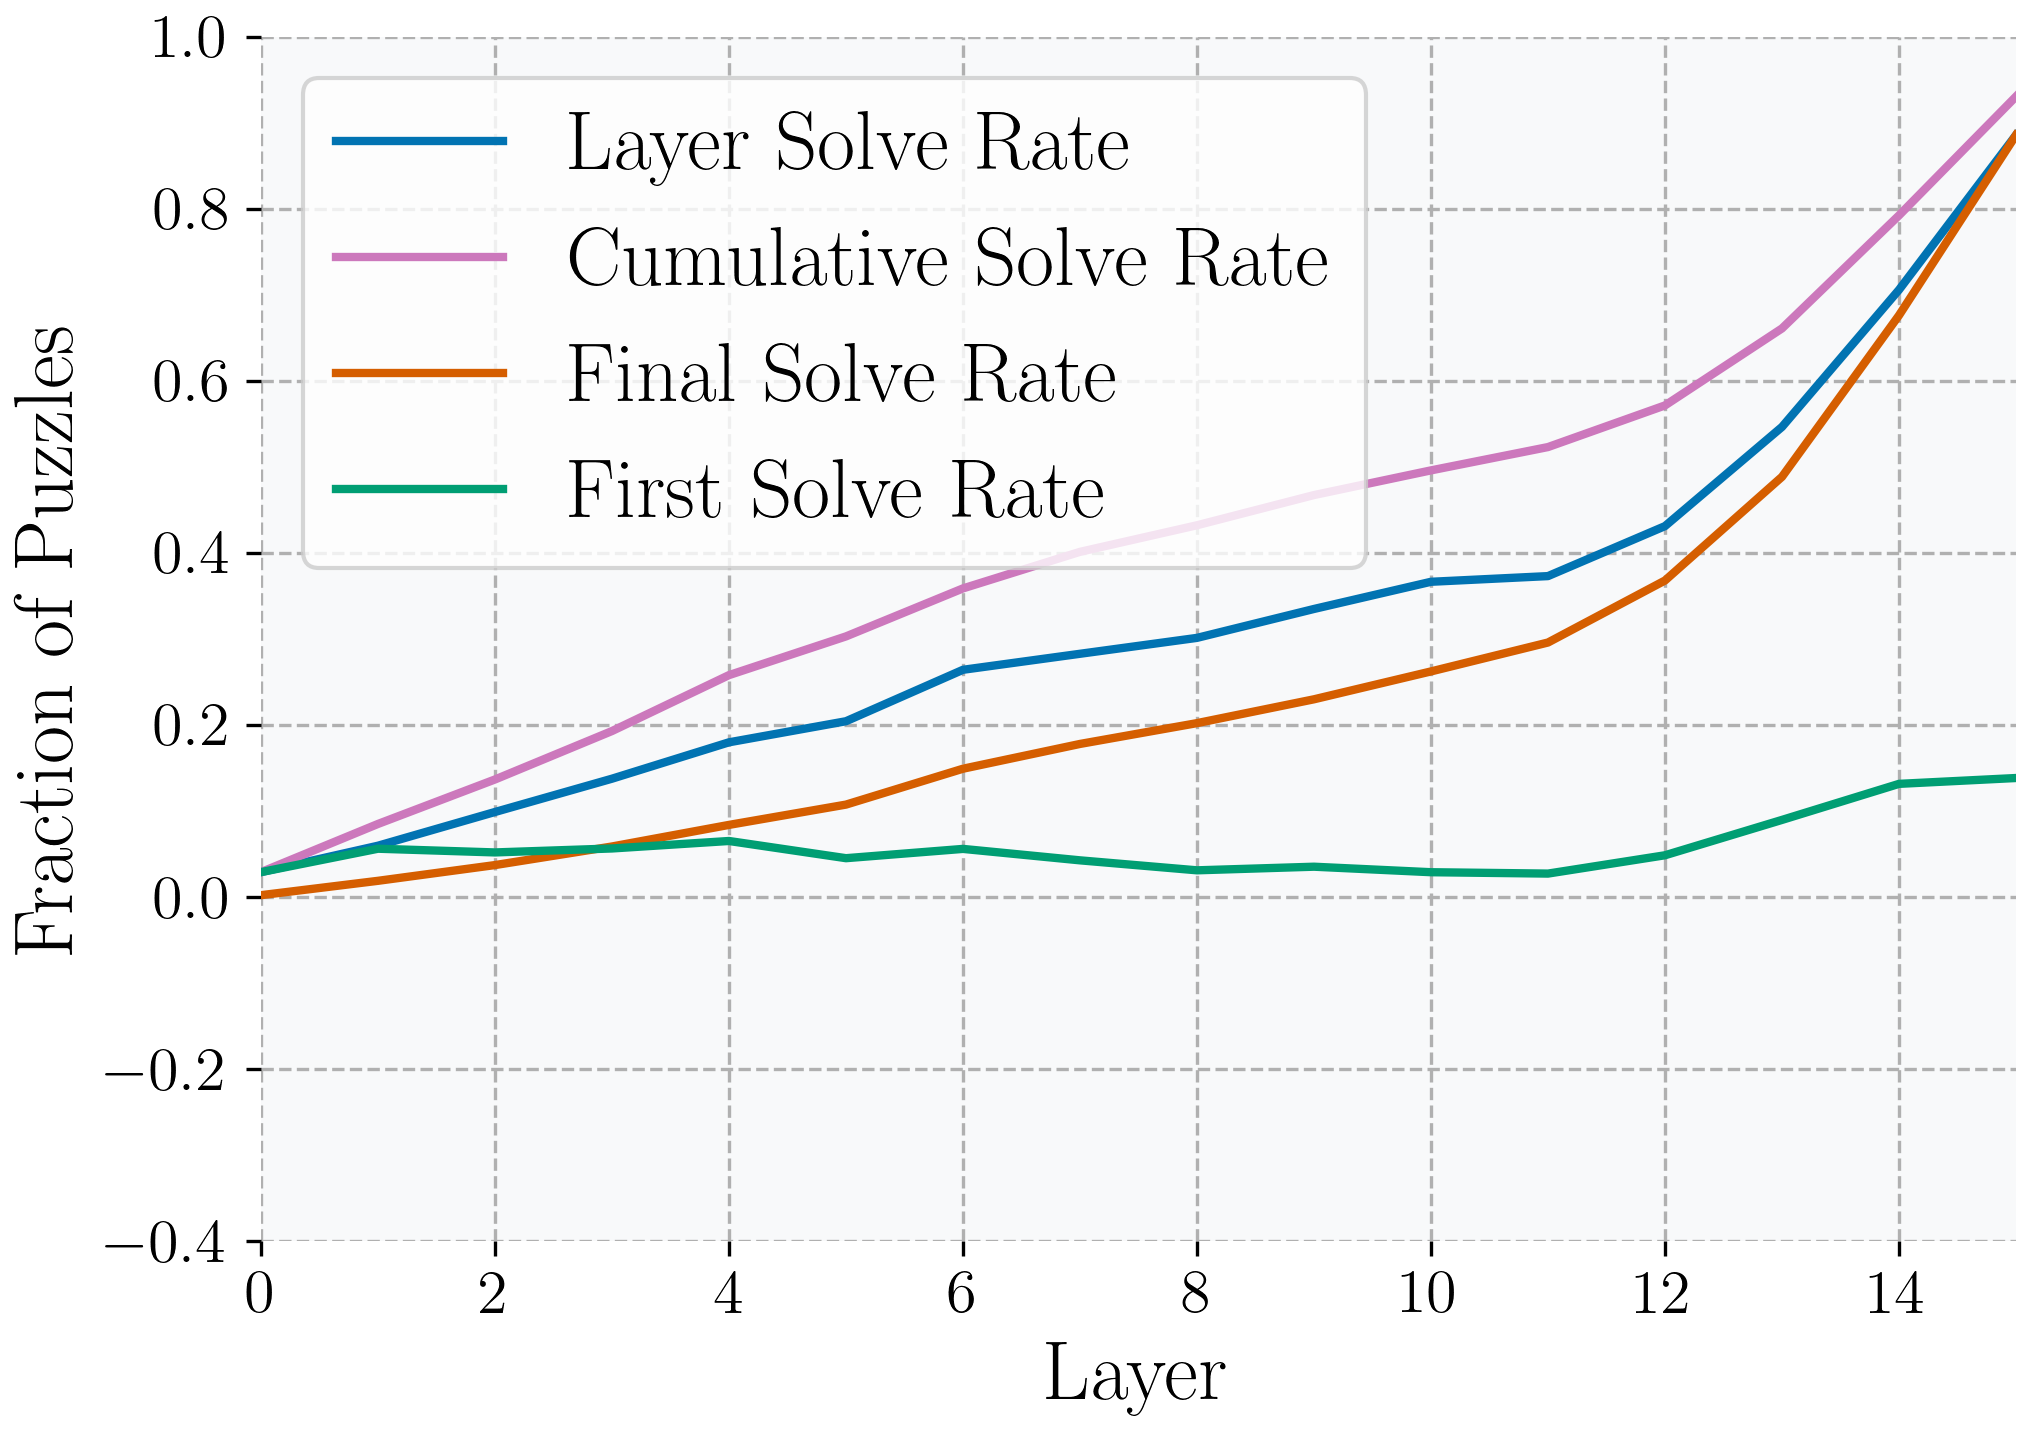

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ast
import leela_interp.tools.figure_helpers as fh 

# Enable LaTeX rendering in matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 20,
    "font.size": 11,
    "legend.fontsize": 20,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "figure.figsize": (7, 5),    # Wider figure for multiple lines
    "figure.dpi": 300,           # High DPI for print quality
    "savefig.bbox": "tight",     # Tight bounding box
    "savefig.pad_inches": 0.05   # Minimal padding
})

# Style configuration (similar to fh module)
PLOT_FACE_COLOR = fh.PLOT_FACE_COLOR  # Light gray background
ERROR_ALPHA = 0.2
LINE_WIDTH = 2
COLORS = ['#0173B2', '#CC78BC', '#D55E00', '#009E73']  # Colorblind-friendly palette

def compute_comprehensive_solve_rates(df):
    """
    Compute four types of solve rates:
    1. Layer solve rate: fraction solved by each layer
    2. Cumulative solve rate: fraction solved by this layer OR any layer before
    3. Final solve rate: fraction solved by this layer AND all later layers
    4. First solve rate: fraction first solved by this layer (not solved by earlier layers)
    
    Args:
        df: Dataframe containing a 'solved_by_layer' column with dictionaries
    
    Returns:
        tuple: (layer_indices, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates)
    """
    # Extract the solved_by_layer dictionaries
    solved_by_layer_dicts = []
    
    for item in df['solved_by_layer']:
        if isinstance(item, str):
            # Convert string representation to dictionary
            solved_by_layer_dicts.append(ast.literal_eval(item))
        else:
            solved_by_layer_dicts.append(item)
    
    # Find the maximum layer index
    max_layer = max(max(d.keys()) for d in solved_by_layer_dicts)
    total_puzzles = len(df)
    
    # Initialize arrays
    layer_indices = list(range(max_layer + 1))
    layer_solve_counts = [0] * (max_layer + 1)
    cumulative_solve_counts = [0] * (max_layer + 1)
    final_solve_counts = [0] * (max_layer + 1)
    first_solve_counts = [0] * (max_layer + 1)
    
    # Process each puzzle
    for puzzle_dict in solved_by_layer_dicts:
        # Track if puzzle has been solved by any earlier layer
        solved_by_earlier = False
        
        # Go through layers in order for cumulative and first solve
        for layer in range(max_layer + 1):
            layer_solved = puzzle_dict.get(layer, False)
            
            # 1. Layer solve rate: count if this layer solved it
            if layer_solved:
                layer_solve_counts[layer] += 1
            
            # 2. Cumulative solve rate: count if this layer OR any earlier layer solved it
            if layer_solved or solved_by_earlier:
                cumulative_solve_counts[layer] += 1
            
            # 4. First solve rate: count if this is the FIRST layer to solve it
            if layer_solved and not solved_by_earlier:
                first_solve_counts[layer] += 1
            
            # Update whether any earlier layer has solved it
            if layer_solved:
                solved_by_earlier = True
        
        # 3. Final solve rate: count if this layer AND all later layers solved it
        for layer in range(max_layer + 1):
            # Check if this layer and ALL later layers solved the puzzle
            all_later_solved = True
            for later_layer in range(layer, max_layer + 1):
                if not puzzle_dict.get(later_layer, False):
                    all_later_solved = False
                    break
            
            if all_later_solved:
                final_solve_counts[layer] += 1
    
    # Convert to rates
    layer_rates = [count / total_puzzles for count in layer_solve_counts]
    cumulative_rates = [count / total_puzzles for count in cumulative_solve_counts]
    final_solve_rates = [count / total_puzzles for count in final_solve_counts]
    first_solve_rates = [count / total_puzzles for count in first_solve_counts]
    
    return layer_indices, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates

def plot_comprehensive_solve_analysis(df):
    """
    Create a comprehensive plot showing all four solve rate metrics.
    """
    # Compute all solve rates
    layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates = compute_comprehensive_solve_rates(df)
    
    # Create layer mapping (0 -> Input, 1 -> "0", 2 -> "1", ..., final -> "Final")
    layer_mapping = {}
    for i in range(len(layers)):
        if i == 0:
            layer_mapping[i] = "Input"
        elif i == len(layers) - 1:
            layer_mapping[i] = "Final"
        else:
            layer_mapping[i] = str(i - 1)  # Layer 1 -> "0", Layer 2 -> "1", etc.
    
    # Create figure with style similar to probe results
    fig, ax = plt.subplots(figsize=(7, 5))
    
    # Plot all four metrics with consistent styling
    ax.plot(layers, layer_rates, 
            color=COLORS[0], linewidth=LINE_WIDTH, 
            label='Layer Solve Rate')
    
    ax.plot(layers, cumulative_rates, 
            color=COLORS[1], linewidth=LINE_WIDTH,
            label='Cumulative Solve Rate')
    
    ax.plot(layers, final_solve_rates, 
            color=COLORS[2], linewidth=LINE_WIDTH,
            label='Final Solve Rate')
    
    ax.plot(layers, first_solve_rates, 
            color=COLORS[3], linewidth=LINE_WIDTH,
            label='First Solve Rate')
    
    # Formatting in probe style
    ax.set_xlabel('Layer')
    ax.set_ylabel('Fraction of Puzzles')
    ax.set_ylim(-0.4, 1.0)
    ax.set_xlim(0, len(layers) - 1)
    
    # Remove spines and set background
    ax.spines[:].set_visible(False)
    ax.set_facecolor(PLOT_FACE_COLOR)
    
    # Grid styling
    ax.grid(linestyle="--")
    ax.grid(which="minor", alpha=0.3, linestyle="--")
    
    # Legend
    ax.legend()
    
    # Add dataset size annotation
    #bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
    #ax.text(0.05, 0.95, f"$n = {len(df)}$", 
    #        transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=bbox_props)
    
    plt.tight_layout()
    
    # Print summary statistics
    print("=== PUZZLE SOLVE RATE ANALYSIS ===")
    print(f"Total puzzles: {len(df)}")
    print(f"\nFinal layer performance:")
    print(f"  Layer solve rate: {layer_rates[-1]:.3f}")
    print(f"  Cumulative solve rate: {cumulative_rates[-1]:.3f}")
    print(f"  Final solve rate: {final_solve_rates[-1]:.3f}")
    print(f"  First solve rate: {first_solve_rates[-1]:.3f}")
    
    print(f"\nLayerwise first solve breakdown:")
    for i, (layer, rate) in enumerate(zip(layers, first_solve_rates)):
        if rate > 0:
            label = layer_mapping.get(layer, str(layer))
            print(f"  {label}: {rate:.3f} ({rate*len(df):.0f} puzzles)")
    
    print(f"\nFinal solve rate pattern (solved by layer AND all later layers):")
    for i, (layer, rate) in enumerate(zip(layers, final_solve_rates)):
        if rate > 0:
            label = layer_mapping.get(layer, str(layer))
            print(f"  {label}: {rate:.3f} ({rate*len(df):.0f} puzzles)")
    
    # Verification: first solve rates should sum to cumulative final rate
    total_first_solves = sum(first_solve_rates)
    print(f"\nVerification:")
    print(f"  Sum of first solve rates: {total_first_solves:.3f}")
    print(f"  Final cumulative rate: {cumulative_rates[-1]:.3f}")
    print(f"  Match: {abs(total_first_solves - cumulative_rates[-1]) < 0.001}")
    
    return fig, ax, (layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates)

def analyze_layer_contributions(df):
    """
    Provide detailed analysis of how each layer contributes to puzzle solving.
    """
    layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates = compute_comprehensive_solve_rates(df)
    
    print("\n=== DETAILED LAYER ANALYSIS ===")
    
    # Find layers with significant contributions
    significant_layers = []
    for i, (layer, first_rate) in enumerate(zip(layers, first_solve_rates)):
        if first_rate > 0.01:  # More than 1% of puzzles
            significant_layers.append((layer, first_rate))
    
    print(f"\nLayers with >1% first solve contribution:")
    for layer, rate in significant_layers:
        layer_name = "Input" if layer == 0 else ("Final" if layer == layers[-1] else f"Layer {layer-1}")
        print(f"  {layer_name}: {rate:.1%}")
    
    # Analyze improvement patterns
    print(f"\nSolve rate improvements by layer:")
    prev_cumulative = 0
    for i, (layer, cumulative) in enumerate(zip(layers, cumulative_rates)):
        improvement = cumulative - prev_cumulative
        layer_name = "Input" if layer == 0 else ("Final" if layer == layers[-1] else f"Layer {layer-1}")
        if improvement > 0:
            print(f"  {layer_name}: +{improvement:.3f} ({improvement:.1%})")
        prev_cumulative = cumulative
    
    # Analyze consistency (final solve rates)
    print(f"\nConsistency analysis (solved by this layer AND all later layers):")
    for i, (layer, final_rate) in enumerate(zip(layers, final_solve_rates)):
        layer_name = "Input" if layer == 0 else ("Final" if layer == layers[-1] else f"Layer {layer-1}")
        if final_rate > 0:
            consistency_ratio = final_rate / layer_rates[i] if layer_rates[i] > 0 else 0
            print(f"  {layer_name}: {final_rate:.3f} ({consistency_ratio:.1%} of layer solutions are consistent)")
    
    return layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates



# Example usage:
# Assuming you have loaded puzzle_results
# puzzle_results = pd.read_csv("../results/puzzle_results.csv")

# Create the comprehensive plot
# fig, ax, metrics = plot_comprehensive_solve_analysis(puzzle_results)

# Get detailed analysis
# detailed_metrics = analyze_layer_contributions(puzzle_results)

# Save the plot
# plt.savefig('comprehensive_puzzle_solve_rates.pdf')
# plt.savefig('comprehensive_puzzle_solve_rates.png', dpi=300)
# plt.show()

# To run with your data:
fig, ax, metrics = plot_comprehensive_solve_analysis(puzzle_results)
# detailed_metrics = analyze_layer_contributions(puzzle_results)

=== PUZZLE SOLVE RATE ANALYSIS ===
Total puzzles: 10000
\nFinal layer performance:
  Layer solve rate: 0.886
  Cumulative solve rate: 0.930
  Final solve rate: 0.886
  First solve rate: 0.138
\nLayerwise first solve breakdown:
  Input: 0.029 (288 puzzles)
  0: 0.056 (560 puzzles)
  1: 0.052 (517 puzzles)
  2: 0.056 (563 puzzles)
  3: 0.065 (650 puzzles)
  4: 0.045 (450 puzzles)
  5: 0.056 (558 puzzles)
  6: 0.043 (425 puzzles)
  7: 0.031 (309 puzzles)
  8: 0.035 (351 puzzles)
  9: 0.029 (287 puzzles)
  10: 0.027 (271 puzzles)
  11: 0.048 (484 puzzles)
  12: 0.089 (895 puzzles)
  13: 0.131 (1314 puzzles)
  Final: 0.138 (1382 puzzles)
\nFinal solve rate pattern (solved by layer AND all later layers):
  Input: 0.002 (20 puzzles)
  0: 0.019 (187 puzzles)
  1: 0.037 (370 puzzles)
  2: 0.059 (586 puzzles)
  3: 0.084 (837 puzzles)
  4: 0.107 (1073 puzzles)
  5: 0.149 (1490 puzzles)
  6: 0.178 (1778 puzzles)
  7: 0.202 (2020 puzzles)
  8: 0.230 (2297 puzzles)
  9: 0.262 (2621 puzzles)
  10: 0.

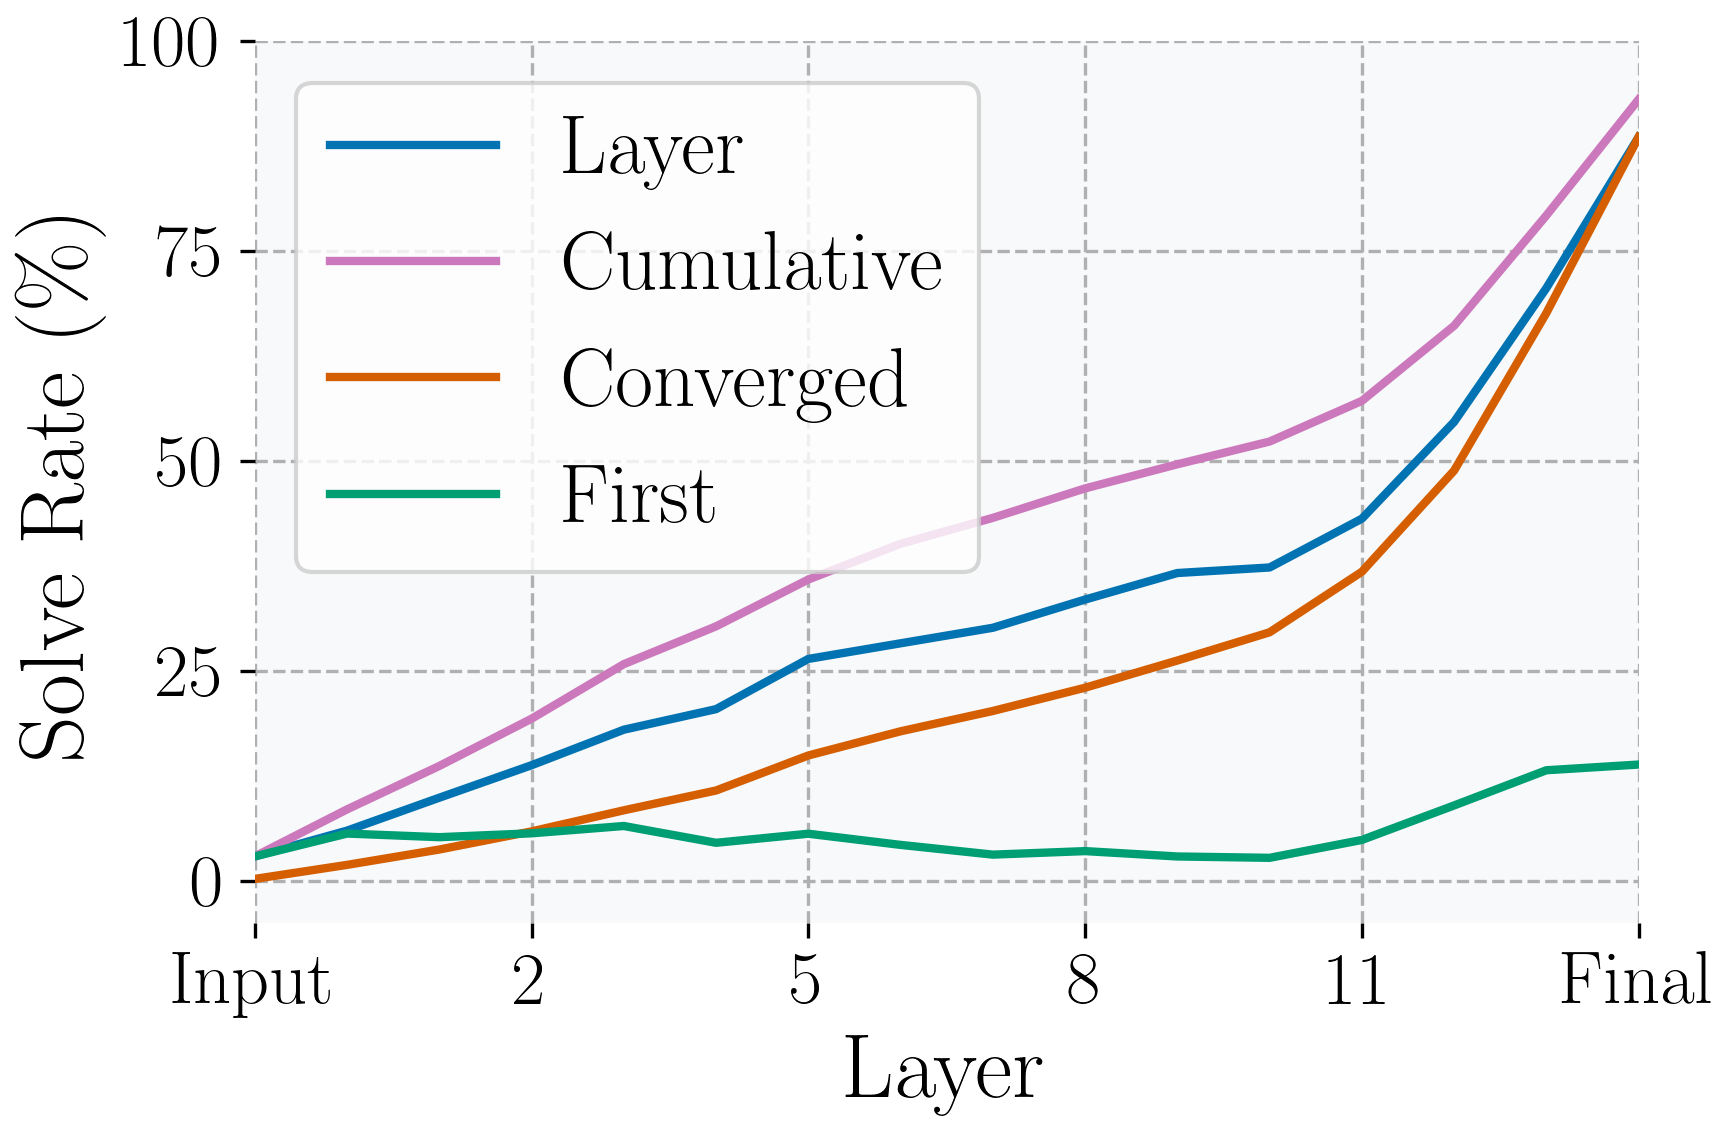

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ast

# Enable LaTeX rendering in matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 22,
    "font.size": 11,
    "legend.fontsize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "figure.figsize": (7, 1),    # Wider figure for multiple lines
    "figure.dpi": 300,           # High DPI for print quality
    "savefig.bbox": "tight",     # Tight bounding box
    "savefig.pad_inches": 0.05   # Minimal padding
})

# Style configuration (similar to fh module)
PLOT_FACE_COLOR = fh.PLOT_FACE_COLOR# '#f8f8f8'  # Light gray background
ERROR_ALPHA = 0.2
LINE_WIDTH = 2
COLORS = ['#0173B2', '#CC78BC', '#D55E00', '#009E73']  # Colorblind-friendly palette

def compute_comprehensive_solve_rates(df):
    """
    Compute four types of solve rates:
    1. Layer solve rate: fraction solved by each layer
    2. Cumulative solve rate: fraction solved by this layer OR any layer before
    3. Final solve rate: fraction solved by this layer AND all later layers
    4. First solve rate: fraction first solved by this layer (not solved by earlier layers)
    
    Args:
        df: Dataframe containing a 'solved_by_layer' column with dictionaries
    
    Returns:
        tuple: (layer_indices, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates)
    """
    # Extract the solved_by_layer dictionaries
    solved_by_layer_dicts = []
    
    for item in df['solved_by_layer']:
        if isinstance(item, str):
            # Convert string representation to dictionary
            solved_by_layer_dicts.append(ast.literal_eval(item))
        else:
            solved_by_layer_dicts.append(item)
    
    # Find the maximum layer index
    max_layer = max(max(d.keys()) for d in solved_by_layer_dicts)
    total_puzzles = len(df)
    
    # Initialize arrays
    layer_indices = list(range(max_layer + 1))
    layer_solve_counts = [0] * (max_layer + 1)
    cumulative_solve_counts = [0] * (max_layer + 1)
    final_solve_counts = [0] * (max_layer + 1)
    first_solve_counts = [0] * (max_layer + 1)
    
    # Process each puzzle
    for puzzle_dict in solved_by_layer_dicts:
        # Track if puzzle has been solved by any earlier layer
        solved_by_earlier = False
        
        # Go through layers in order for cumulative and first solve
        for layer in range(max_layer + 1):
            layer_solved = puzzle_dict.get(layer, False)
            
            # 1. Layer solve rate: count if this layer solved it
            if layer_solved:
                layer_solve_counts[layer] += 1
            
            # 2. Cumulative solve rate: count if this layer OR any earlier layer solved it
            if layer_solved or solved_by_earlier:
                cumulative_solve_counts[layer] += 1
            
            # 4. First solve rate: count if this is the FIRST layer to solve it
            if layer_solved and not solved_by_earlier:
                first_solve_counts[layer] += 1
            
            # Update whether any earlier layer has solved it
            if layer_solved:
                solved_by_earlier = True
        
        # 3. Final solve rate: count if this layer AND all later layers solved it
        for layer in range(max_layer + 1):
            # Check if this layer and ALL later layers solved the puzzle
            all_later_solved = True
            for later_layer in range(layer, max_layer + 1):
                if not puzzle_dict.get(later_layer, False):
                    all_later_solved = False
                    break
            
            if all_later_solved:
                final_solve_counts[layer] += 1
    
    # Convert to rates
    layer_rates = [count / total_puzzles for count in layer_solve_counts]
    cumulative_rates = [count / total_puzzles for count in cumulative_solve_counts]
    final_solve_rates = [count / total_puzzles for count in final_solve_counts]
    first_solve_rates = [count / total_puzzles for count in first_solve_counts]
    
    return layer_indices, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates

def plot_comprehensive_solve_analysis(df):
    """
    Create a comprehensive plot showing all four solve rate metrics.
    """
    # Compute all solve rates
    layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates = compute_comprehensive_solve_rates(df)
    
    # Create figure with style similar to probe results
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Plot all four metrics with consistent styling
    ax.plot(range(len(layers)), layer_rates, 
            color=COLORS[0], linewidth=LINE_WIDTH, 
            label='Layer')
    
    ax.plot(range(len(layers)), cumulative_rates, 
            color=COLORS[1], linewidth=LINE_WIDTH,
            label='Cumulative')
    
    ax.plot(range(len(layers)), final_solve_rates, 
            color=COLORS[2], linewidth=LINE_WIDTH,
            label='Converged')
    
    ax.plot(range(len(layers)), first_solve_rates, 
            color=COLORS[3], linewidth=LINE_WIDTH,
            label='First')
    
    # Formatting in probe style
    ax.set_xlabel('Layer')
    ax.set_ylabel('Solve Rate (\\%)')
    ax.set_ylim(-0.05, 1.0)
    ax.set_xlim(0, len(layers) - 1)

    # Format y-axis to show percentages
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels(['0', '25', '50', '75', '100'])
    
    # Create x-tick labels: Input, 0, 1, 2, ..., Final
    x_tick_labels = []
    for i in range(len(layers)):
        if i == 0:
            x_tick_labels.append("Input")
        elif i == len(layers) - 1:
            x_tick_labels.append("Final")
        else:
            x_tick_labels.append(str(i - 1))
    
    # Set custom x-ticks
    num_layers = len(layers)
    if num_layers <= 8:
        ax.set_xticks(range(num_layers))
        ax.set_xticklabels(x_tick_labels)
    else:
        # For many layers, show only some layer indices
        step = max(1, num_layers // 5)
        selected_ticks = list(range(0, num_layers, step))
        if num_layers - 1 not in selected_ticks:
            selected_ticks.append(num_layers - 1)  # Always show the last layer
        
        ax.set_xticks(selected_ticks)
        ax.set_xticklabels([x_tick_labels[i] for i in selected_ticks], rotation=0)
    
    # Remove spines and set background
    ax.spines[:].set_visible(False)
    ax.set_facecolor(PLOT_FACE_COLOR)
    
    # Grid styling
    ax.grid(linestyle="--")
    ax.grid(which="minor", alpha=0.3, linestyle="--")
    
    # Legend
    ax.legend()
    
    plt.tight_layout()
    
    # Print summary statistics
    print("=== PUZZLE SOLVE RATE ANALYSIS ===")
    print(f"Total puzzles: {len(df)}")
    print(f"\\nFinal layer performance:")
    print(f"  Layer solve rate: {layer_rates[-1]:.3f}")
    print(f"  Cumulative solve rate: {cumulative_rates[-1]:.3f}")
    print(f"  Final solve rate: {final_solve_rates[-1]:.3f}")
    print(f"  First solve rate: {first_solve_rates[-1]:.3f}")
    
    print(f"\\nLayerwise first solve breakdown:")
    for i, (layer, rate) in enumerate(zip(layers, first_solve_rates)):
        if rate > 0:
            label = x_tick_labels[i] if i < len(x_tick_labels) else str(layer)
            print(f"  {label}: {rate:.3f} ({rate*len(df):.0f} puzzles)")
    
    print(f"\\nFinal solve rate pattern (solved by layer AND all later layers):")
    for i, (layer, rate) in enumerate(zip(layers, final_solve_rates)):
        if rate > 0:
            label = x_tick_labels[i] if i < len(x_tick_labels) else str(layer)
            print(f"  {label}: {rate:.3f} ({rate*len(df):.0f} puzzles)")
    
    # Verification: first solve rates should sum to cumulative final rate
    total_first_solves = sum(first_solve_rates)
    print(f"\\nVerification:")
    print(f"  Sum of first solve rates: {total_first_solves:.3f}")
    print(f"  Final cumulative rate: {cumulative_rates[-1]:.3f}")
    print(f"  Match: {abs(total_first_solves - cumulative_rates[-1]) < 0.001}")
    
    return fig, ax, (layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates)

def analyze_layer_contributions(df):
    """
    Provide detailed analysis of how each layer contributes to puzzle solving.
    """
    layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates = compute_comprehensive_solve_rates(df)
    
    print("\\n=== DETAILED LAYER ANALYSIS ===")
    
    # Create x-tick labels for reference
    x_tick_labels = []
    for i in range(len(layers)):
        if i == 0:
            x_tick_labels.append(None)#"Input")
        elif i == len(layers) - 1:
            x_tick_labels.append(None)#"Final")
        else:
            x_tick_labels.append(str(i - 1))
    
    # Find layers with significant contributions
    significant_layers = []
    for i, (layer, first_rate) in enumerate(zip(layers, first_solve_rates)):
        if first_rate > 0.01:  # More than 1% of puzzles
            significant_layers.append((i, first_rate))
    
    print(f"\\nLayers with >1% first solve contribution:")
    for layer_idx, rate in significant_layers:
        layer_name = x_tick_labels[layer_idx] if layer_idx < len(x_tick_labels) else str(layer_idx)
        print(f"  {layer_name}: {rate:.1%}")
    
    # Analyze improvement patterns
    print(f"\\nSolve rate improvements by layer:")
    prev_cumulative = 0
    for i, (layer, cumulative) in enumerate(zip(layers, cumulative_rates)):
        improvement = cumulative - prev_cumulative
        layer_name = x_tick_labels[i] if i < len(x_tick_labels) else str(layer)
        if improvement > 0:
            print(f"  {layer_name}: +{improvement:.3f} ({improvement:.1%})")
        prev_cumulative = cumulative
    
    # Analyze consistency (final solve rates)
    print(f"\\nConsistency analysis (solved by this layer AND all later layers):")
    for i, (layer, final_rate) in enumerate(zip(layers, final_solve_rates)):
        layer_name = x_tick_labels[i] if i < len(x_tick_labels) else str(layer)
        if final_rate > 0:
            consistency_ratio = final_rate / layer_rates[i] if layer_rates[i] > 0 else 0
            print(f"  {layer_name}: {final_rate:.3f} ({consistency_ratio:.1%} of layer solutions are consistent)")
    
    return layers, layer_rates, cumulative_rates, final_solve_rates, first_solve_rates

# Example usage:
# To run with your data:
fig, ax, metrics = plot_comprehensive_solve_analysis(puzzle_results)
# detailed_metrics = analyze_layer_contributions(puzzle_results)

# Save as PDF for LaTeX documents
plt.savefig('Figures/puzzle_solve_rates.pdf')

plt.show()

### Fraction of puzzles that are solved by each layer grouped by elo rating

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import ast
import pandas as pd
from matplotlib.ticker import MultipleLocator

import leela_interp.tools.figure_helpers as fh

In [14]:
# Enable LaTeX rendering in matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "axes.labelsize": 11,
    "font.size": 11,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.dpi": 300,
    "savefig.bbox": "tight",
    "savefig.pad_inches": 0.05
})

In [15]:
fh.set(fast=False)   # set(fast=True) for quick non-LaTeX previews

In [16]:
def compute_layer_performance_by_rating(df, custom_ranges=None):
    """
    Compute the puzzle solving performance of each layer grouped by rating ranges.
    
    Args:
        df: Dataframe with 'Rating' and 'solved_by_layer' columns
        custom_ranges: List of tuples defining custom rating ranges [(min1, max1), (min2, max2), ...]
    
    Returns:
        tuple: (rating_labels, performance, counts)
    """
    # Find rating column
    if 'Rating' not in df.columns:
        rating_candidates = [col for col in df.columns if 'rating' in col.lower()]
        if rating_candidates:
            rating_col = rating_candidates[0]
        else:
            raise ValueError("No rating column found in the dataframe")
    else:
        rating_col = 'Rating'
    
    # Convert ratings to numeric if needed
    df[rating_col] = pd.to_numeric(df[rating_col], errors='coerce')
    
    # Extract the solved_by_layer dictionaries
    solved_by_layer_dicts = []
    for item in df['solved_by_layer']:
        if isinstance(item, str):
            # Convert string representation to dictionary
            solved_by_layer_dicts.append(ast.literal_eval(item))
        else:
            solved_by_layer_dicts.append(item)
    
    # Find the maximum layer index
    max_layer = max(max(d.keys()) for d in solved_by_layer_dicts)
    num_layers = max_layer + 1
    
    # Use custom ranges if provided, otherwise use default 200-step ranges
    if custom_ranges is None:
        rating_step = 200
        min_rating = int(df[rating_col].min() // rating_step * rating_step)
        max_rating = int((df[rating_col].max() // rating_step + 1) * rating_step)
        rating_ranges = [(r, r + rating_step) for r in range(min_rating, max_rating, rating_step)]
    else:
        rating_ranges = custom_ranges
    
    # Initialize performance matrix: [rating_range, layer]
    performance = np.zeros((len(rating_ranges), num_layers))
    counts = np.zeros(len(rating_ranges))
    
    # Compute solve rates for each rating range and layer
    for i, (min_r, max_r) in enumerate(rating_ranges):
        # Filter puzzles in this rating range
        range_mask = (df[rating_col] >= min_r) & (df[rating_col] < max_r)
        puzzles_in_range = df[range_mask]
        counts[i] = len(puzzles_in_range)
        
        if counts[i] > 0:
            # Get solved_by_layer for puzzles in this range
            range_indices = np.where(range_mask)[0]
            range_dicts = [solved_by_layer_dicts[j] for j in range_indices]
            
            # Compute solve rate for each layer
            for layer in range(num_layers):
                solved_count = sum(1 for d in range_dicts if layer in d and d[layer])
                performance[i, layer] = solved_count / counts[i] * 100  # as percentage
    
    # Format rating ranges as strings
    rating_labels = [f"{min_r}-{max_r}" for min_r, max_r in rating_ranges]
    
    return rating_labels, performance, counts

In [24]:
def create_thesis_rating_grid(df, rows=3, cols=4):
    """
    Create a grid of rating ranges with bars for all layers,
    styled for a thesis with LaTeX formatting.
    
    Args:
        df: DataFrame with puzzles data
        rows: Number of rows in the grid
        cols: Number of columns in the grid
    
    Returns:
        The created figure
    """
    # Define custom ranges combining specific Elo ranges
    custom_ranges = [
        (200, 800),    # Low
        (800, 1000),   # Medium-low
        (1000, 1200),  # Medium
        (1200, 1400),  # Medium-high
        (1400, 1600),  # High
        (1600, 1800),  # Very high
        (1800, 2200),  # Expert
        (2200, 3000)   # Master
    ]

    # Compute layer performance by rating using custom ranges
    rating_labels, performance, counts = compute_layer_performance_by_rating(df, custom_ranges)
    
    # Determine number of layers
    num_layers = performance.shape[1]
    
    # Create figure with subplots - white background for figure
    fig = plt.figure(figsize=(15, 9), facecolor='white')
    gs = fig.add_gridspec(rows, cols)
    axes = []
    
    # Create subplots with background
    for i in range(rows):
        for j in range(cols):
            ax = fig.add_subplot(gs[i, j])
            ax.set_facecolor(fh.PLOT_FACE_COLOR) 
            axes.append(ax)
    
    # Flatten axes for easier indexing
    axes = np.array(axes).flatten()
    
    # Define colors - use a scientific color palette
    colors = [
        #'b', 
        '#2E86AB', # scientific blue
        #'#1f77b4', # standard blue
        #'#0173B2',  # Blue
        #'#DE8F05',  # Orange
        #'#029E73',  # Green
        #'#D55E00',  # Red
        #'#CC78BC',  # Purple
        #'#CA9161',  # Brown
        #'#FBAFE4',  # Pink
        #'#949494',  # Gray
        #'#ECE133',  # Yellow
        #'#56B4E9',  # Light blue
        #'#0173B2',  # Blue (repeat with lower alpha)
        #'#DE8F05',  # Orange (repeat with lower alpha)
        #'#029E73',  # Green (repeat with lower alpha)
        #'#D55E00',  # Red (repeat with lower alpha)
        #'#CC78BC'   # Purple (repeat with lower alpha)
    ]
    
    # Ensure we have enough colors for all layers
    if num_layers > len(colors):
        colors = colors * (num_layers // len(colors) + 1)
    colors = colors[:num_layers]
    
    # Create layer mapping similar to the reference plot
    layer_mapping = {
        0: "Input",
        num_layers - 1: "Final"  # Last layer is full model
    }
    
    # For intermediate layers, use 0-based index (like in the reference plot)
    for i in range(1, num_layers - 1):
        layer_mapping[i] = f"{i-1}"
    
    # Plot each rating range in its own subplot
    for i, rating_label in enumerate(rating_labels):
        if i < rows * cols:  # Only plot if we have enough subplots
            ax = axes[i]

            # Remove top and right spines
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            
            # Create x positions for the bars
            x = np.arange(num_layers)
            
            # Plot bars for each layer
            bars = ax.bar(x, performance[i], width=0.7, 
                         color=colors, edgecolor='black', linewidth=0.5)
            
            # Set subplot title with Elo rating range
            ax.set_title(f"Elo {rating_label}", fontsize=20)
            
            # Set y-axis limits and make all subplots share the same y-scale
            ax.set_ylim(0, 100)
            
            # Set y-axis ticks
            ax.set_yticks([0, 20, 40, 60, 80, 100])

            ax.tick_params(axis='y', labelsize=18)
            
            # Set x-ticks using the custom layer mapping
            if num_layers <= 8:
                ax.set_xticks(x)
                ax.set_xticklabels([layer_mapping[j] for j in range(num_layers)], fontsize=9, rotation=45)
            else:
                # For many layers, show only some layer indices
                step = max(1, num_layers // 5)
                selected_ticks = list(range(0, num_layers, step))
                if num_layers - 1 not in selected_ticks:
                    selected_ticks.append(num_layers - 1)  # Always show the last layer
                
                ax.set_xticks([j for j in selected_ticks])
                ax.set_xticklabels([layer_mapping.get(j, str(j)) for j in selected_ticks], fontsize=18, rotation=45) # TODO: Maybe rotate labels
            
            # Add grid
            ax.grid(True, linestyle='--', alpha=0.3)
            
            # Add sample size in the upper left corner of the subplot
            if counts[i] > 0:
                bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8)
                ax.text(0.05, 0.9, f"$n = {int(counts[i])}$", 
                       transform=ax.transAxes, ha='left', va='top', fontsize=18,
                       bbox=bbox_props)
    
    # Hide any unused subplots
    for i in range(len(rating_labels), rows * cols):
        axes[i].set_visible(False)
    
    # Create a custom legend at the top with the new naming scheme
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[j], 
                                   edgecolor='black', linewidth=0.5) 
                     for j in range(num_layers)]
    
    # Use the new layer mapping for legend labels
    legend_labels = [layer_mapping[j] for j in range(num_layers)]
    
    # Calculate number of columns for the legend
    if num_layers <= 8:
        ncol = num_layers
    else:
        ncol = min(8, num_layers // 2 + num_layers % 2)

    
    # Make a single y-axis label for the entire figure - significantly increased size
    fig.text(0.01, 0.6, 'Solve Rate (\%)', va='center', rotation='vertical', fontsize=26)
    
    # Add general x-axis label at the bottom - significantly increased size
    fig.text(0.5, 0.3, 'Layer', ha='center', fontsize=26)
    
    # No overall title as it will be added in LaTeX
    
    # plt.tight_layout()
    plt.subplots_adjust(top=0.78, bottom=0.18, hspace=0.5, wspace=0.2, left=0.06, right=0.96)

    # plt.tight_layout()
    
    return fig

/var/folders/8f/my3yq2094v3c99jtb3vbvk4s3t9d3w/T/ipykernel_23154/754505026.py:140: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors[j],


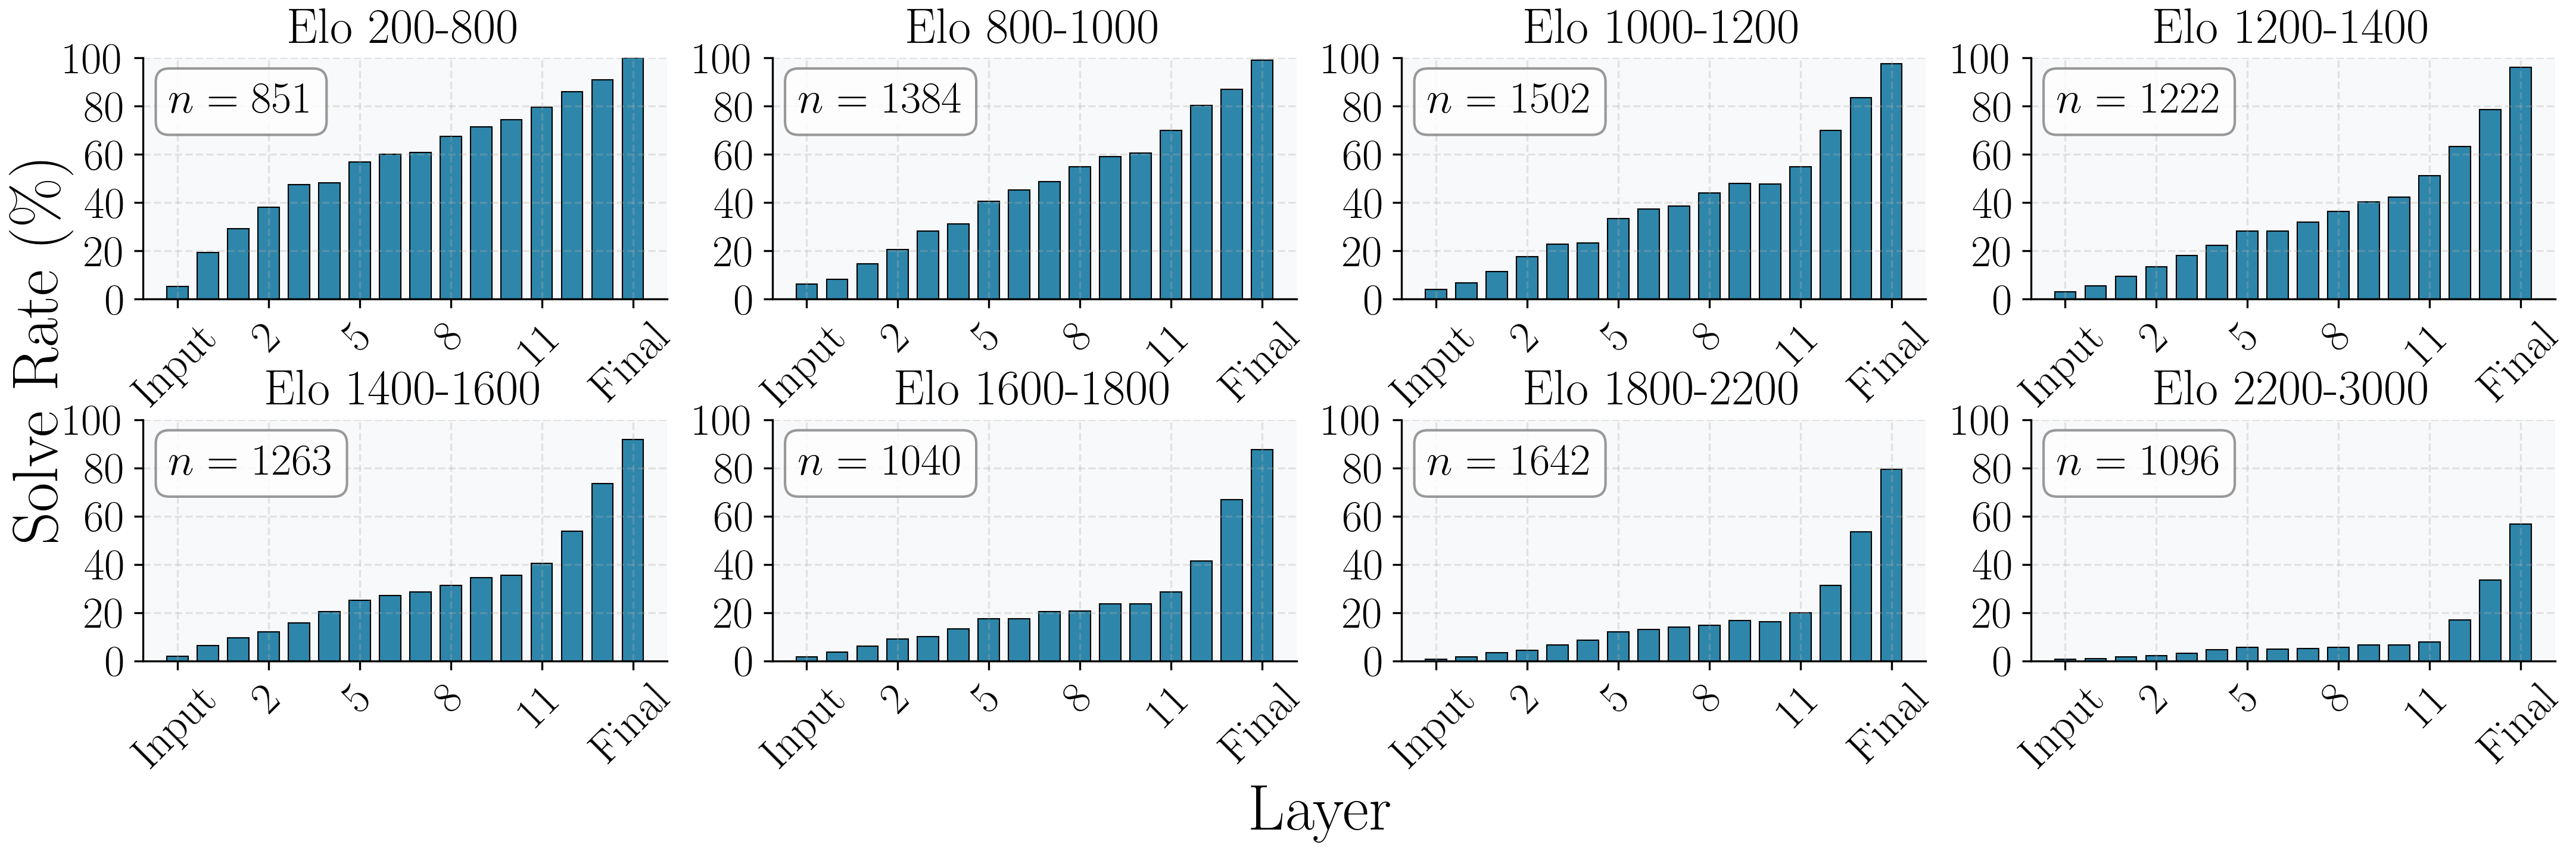

In [25]:
fig = create_thesis_rating_grid(puzzle_results)
plt.savefig('Figures/puzzle_solve_rates_by_rating.pdf', bbox_inches='tight')
plt.savefig('Figures/puzzle_solve_rates_by_rating.png', dpi=300, bbox_inches='tight')
plt.show()

##### Helper function for creating balanced ranges

In [19]:
def create_balanced_rating_ranges(df, target_puzzles_per_range=None, num_ranges=8):
    """
    Create rating ranges with approximately equal number of puzzles in each range.
    
    Args:
        df: DataFrame with rating data
        target_puzzles_per_range: Target number of puzzles per range (if None, uses total/num_ranges)
        num_ranges: Number of ranges to create
    
    Returns:
        List of tuples [(min1, max1), (min2, max2), ...]
    """
    # Find rating column
    rating_col = 'Rating' if 'Rating' in df.columns else [col for col in df.columns if 'rating' in col.lower()][0]
    
    # Convert to numeric and sort
    ratings = pd.to_numeric(df[rating_col], errors='coerce').dropna().sort_values()
    
    if target_puzzles_per_range is None:
        target_puzzles_per_range = len(ratings) // num_ranges
    
    print(f"Total puzzles: {len(ratings)}")
    print(f"Target puzzles per range: {target_puzzles_per_range}")
    
    ranges = []
    start_idx = 0
    
    for i in range(num_ranges):
        if i == num_ranges - 1:  # Last range gets all remaining puzzles
            end_idx = len(ratings) - 1
        else:
            end_idx = min(start_idx + target_puzzles_per_range - 1, len(ratings) - 1)
        
        min_rating = int(ratings.iloc[start_idx])
        max_rating = int(ratings.iloc[end_idx]) + 1  # +1 to make it exclusive upper bound

        print(min_rating, max_rating)
        
        # Round to nearest 50 or 100 for cleaner ranges
        min_rating = round(min_rating / 100) * 100
        max_rating = round(max_rating / 100) * 100

        
        ranges.append((min_rating, max_rating))
        
        # Count actual puzzles in this range for verification
        actual_count = len(ratings[(ratings >= min_rating) & (ratings < max_rating)])
        print(f"Range {min_rating}-{max_rating}: {actual_count} puzzles")
        
        start_idx = end_idx + 1
        if start_idx >= len(ratings):
            break
    
    return ranges

In [20]:
custom_ranges = create_balanced_rating_ranges(puzzle_results, num_ranges=8)

Total puzzles: 10000
Target puzzles per range: 1250
399 870
Range 400-900: 1471 puzzles
869 1040
Range 900-1000: 763 puzzles
1039 1202
Range 1000-1200: 1502 puzzles
1202 1408
Range 1200-1400: 1222 puzzles
1407 1606
Range 1400-1600: 1263 puzzles
1605 1856
Range 1600-1900: 1463 puzzles
1855 2150
Range 1900-2200: 1219 puzzles
2149 2868
Range 2100-2900: 1436 puzzles


In [21]:
custom_ranges

[(400, 900),
 (900, 1000),
 (1000, 1200),
 (1200, 1400),
 (1400, 1600),
 (1600, 1900),
 (1900, 2200),
 (2100, 2900)]